In [ ]:
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import express
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

BASEPATH_DATA='./Data'

In [ ]:
mental_df = pd.read_csv(os.path.join(BASEPATH_DATA , 'mental_health_and_technology_usage_2024.csv'))

In [3]:
mental_df.head(2)

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No


In [4]:
mental_df.describe()

,Age,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.518600,6.474341,3.972321,2.515598,7.975765,6.500724,5.003860
std,13.920217,3.169022,2.313707,1.446748,4.042608,1.450933,2.905044
min,18.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000
25%,29.000000,3.760000,1.980000,1.260000,4.520000,5.260000,2.490000
50%,42.000000,6.425000,3.950000,2.520000,7.900000,6.500000,4.990000
75%,54.000000,9.212500,5.990000,3.790000,11.500000,7.760000,7.540000
max,65.000000,12.000000,8.000000,5.000000,15.000000,9.000000,10.000000


In [5]:
mental_df.Mental_Health_Status.value_counts()

Mental_Health_Status
Excellent    2518
Good         2508
Fair         2490
Poor         2484
Name: count, dtype: int64

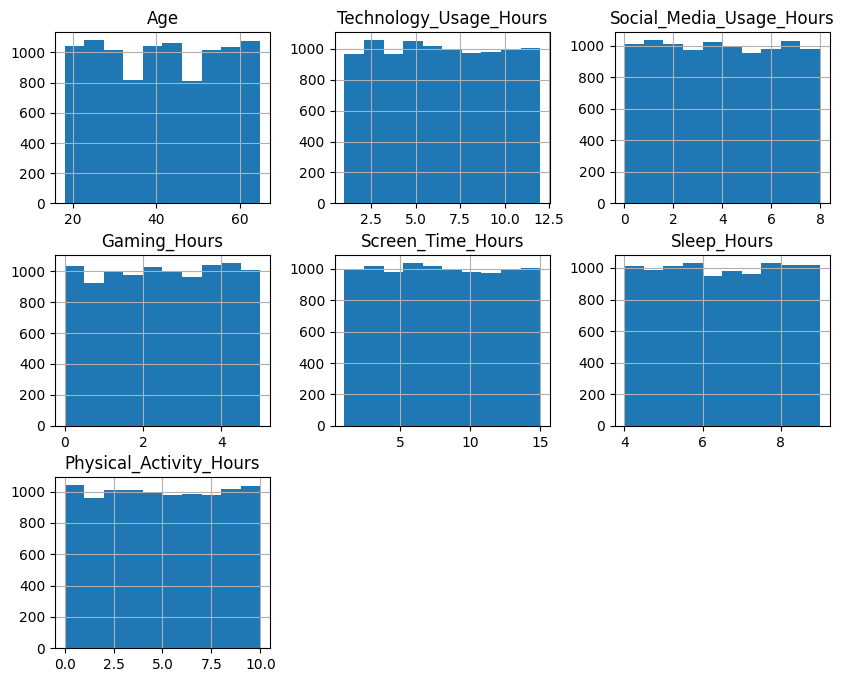

In [ ]:
# To check the distribution, histogram is a good and easy choice

mental_df.hist(figsize=(10 , 8)) 
plt.show()

In [45]:
mental_df.groupby('Mental_Health_Status').describe()

Age                                                \
                       count       mean        std   min   25%   50%   75%   
Mental_Health_Status                                                         
Excellent             2518.0  41.551231  13.863471  18.0  30.0  42.0  53.0   
Fair                  2490.0  42.006827  14.036469  18.0  29.0  42.0  54.0   
Good                  2508.0  41.237241  13.875046  18.0  29.0  41.0  53.0   
Poor                  2484.0  41.280193  13.900993  18.0  29.0  41.0  54.0   

                           Technology_Usage_Hours            ... Sleep_Hours  \
                       max                  count      mean  ...         75%   
Mental_Health_Status                                         ...               
Excellent             65.0                 2518.0  6.438995  ...        7.75   
Fair                  65.0                 2490.0  6.352145  ...        7.75   
Good                  65.0                 2508.0  6.536304  ...        7.73   
Poor                  65.0                 2484.0  6.570101  ...        7.80   

                          Physical_Activity_Hours                            \
                      max                   count      mean       std   min   
Mental_Health_Status                                                          
Excellent             9.0                  2518.0  5.054631  2.890783  0.00   
Fair                  9.0                  2490.0  4.977277  2.934293  0.00   
Good                  9.0                  2508.0  4.964613  2.918785  0.01   
Poor                  9.0                  2484.0  5.018667  2.876830  0.00   

                                                  
                         25%   50%     75%   max  
Mental_Health_Status                              
Excellent             2.5500  5.07  7.5400  10.0  
Fair                  2.3800  4.96  7.6100  10.0  
Good                  2.4575  4.94  7.5400  10.0  
Poor                  2.5375  4.99  7.4725  10.0  

[4 rows x 56 columns]

In [41]:
mental_df.groupby('Mental_Health_Status').mean(numeric_only=True)

,Age,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours
Mental_Health_Status,,,,,,,
Excellent,41.551231,6.438995,3.929365,2.542133,7.949023,6.480175,5.054631
Fair,42.006827,6.352145,4.023783,2.494956,7.920964,6.509289,4.977277
Good,41.237241,6.536304,3.986523,2.503596,8.087707,6.497145,4.964613
Poor,41.280193,6.570101,3.949940,2.521510,7.944783,6.516582,5.018667


In [8]:
mental_df.corr(numeric_only=True)

,Age,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours
Age,1.000000,0.017455,0.009151,0.005204,0.007169,-0.001513,-0.004526
Technology_Usage_Hours,0.017455,1.000000,0.023199,0.014364,0.007947,-0.009804,0.010232
Social_Media_Usage_Hours,0.009151,0.023199,1.000000,0.005812,-0.008401,0.004443,0.002324
Gaming_Hours,0.005204,0.014364,0.005812,1.000000,-0.007817,0.010393,-0.000421
Screen_Time_Hours,0.007169,0.007947,-0.008401,-0.007817,1.000000,-0.011181,0.030502
Sleep_Hours,-0.001513,-0.009804,0.004443,0.010393,-0.011181,1.000000,-0.009996
Physical_Activity_Hours,-0.004526,0.010232,0.002324,-0.000421,0.030502,-0.009996,1.000000


In [9]:
mental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Technology_Usage_Hours    10000 non-null  float64
 4   Social_Media_Usage_Hours  10000 non-null  float64
 5   Gaming_Hours              10000 non-null  float64
 6   Screen_Time_Hours         10000 non-null  float64
 7   Mental_Health_Status      10000 non-null  object 
 8   Stress_Level              10000 non-null  object 
 9   Sleep_Hours               10000 non-null  float64
 10  Physical_Activity_Hours   10000 non-null  float64
 11  Support_Systems_Access    10000 non-null  object 
 12  Work_Environment_Impact   10000 non-null  object 
 13  Online_Support_Usage      10000 non-null  object 
dtypes: floa

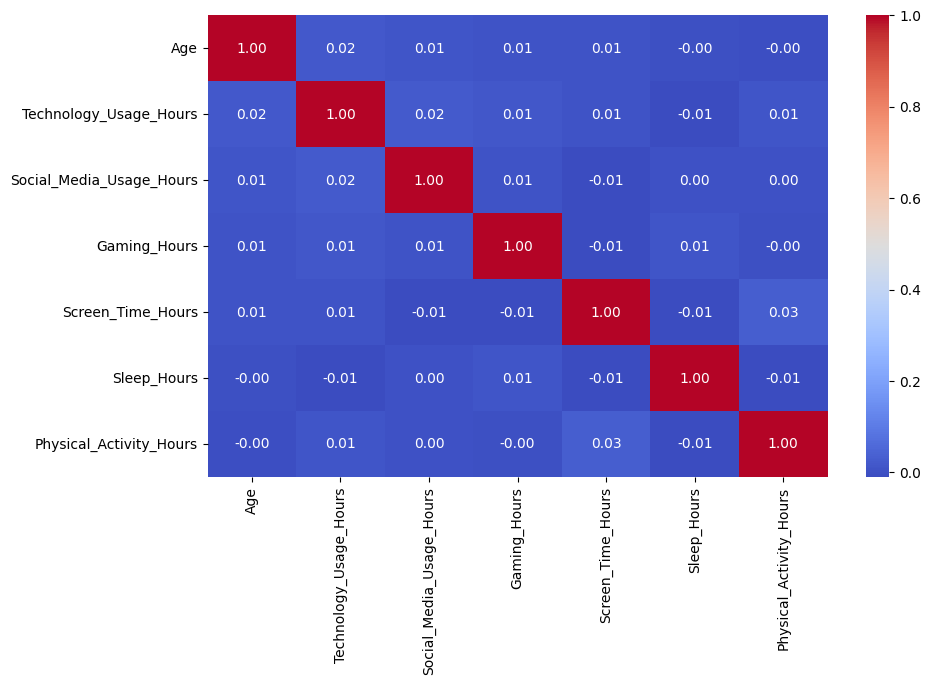

In [10]:
corr = mental_df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [14]:
pd.crosstab(mental_df["Gender"], mental_df["Mental_Health_Status"], normalize="index")

Mental_Health_Status,Excellent,Fair,Good,Poor
Gender,,,,
Female,0.257456,0.237066,0.257760,0.247718
Male,0.250746,0.248657,0.245672,0.254925
Other,0.247325,0.260999,0.249108,0.242568


In [19]:
pd.crosstab(mental_df['Stress_Level'] , mental_df['Work_Environment_Impact'], normalize='index')

Work_Environment_Impact,Negative,Neutral,Positive
Stress_Level,,,
High,0.338138,0.335135,0.326727
Low,0.343637,0.331032,0.325330
Medium,0.331636,0.327442,0.340923


In [37]:
obj_columns = mental_df.columns[mental_df.dtypes=='object'].to_list()
obj_columns.remove('User_ID')
for obj_col1 in obj_columns:
    for obj_col2 in obj_columns:
        if obj_col1==obj_col2:
            pass
        else:
            print('************* ')
            print(pd.crosstab(mental_df[obj_col1] , mental_df[obj_col2] , normalize='index'))


************* 
Mental_Health_Status  Excellent      Fair      Good      Poor
Gender                                                       
Female                 0.257456  0.237066  0.257760  0.247718
Male                   0.250746  0.248657  0.245672  0.254925
Other                  0.247325  0.260999  0.249108  0.242568
************* 
Stress_Level      High       Low    Medium
Gender                                    
Female        0.336884  0.334449  0.328667
Male          0.331343  0.334328  0.334328
Other         0.330856  0.330856  0.338288
************* 
Support_Systems_Access        No       Yes
Gender                                    
Female                  0.510347  0.489653
Male                    0.501493  0.498507
Other                   0.490190  0.509810
************* 
Work_Environment_Impact  Negative   Neutral  Positive
Gender                                               
Female                   0.338405  0.325320  0.336275
Male                     0.337015  0.3

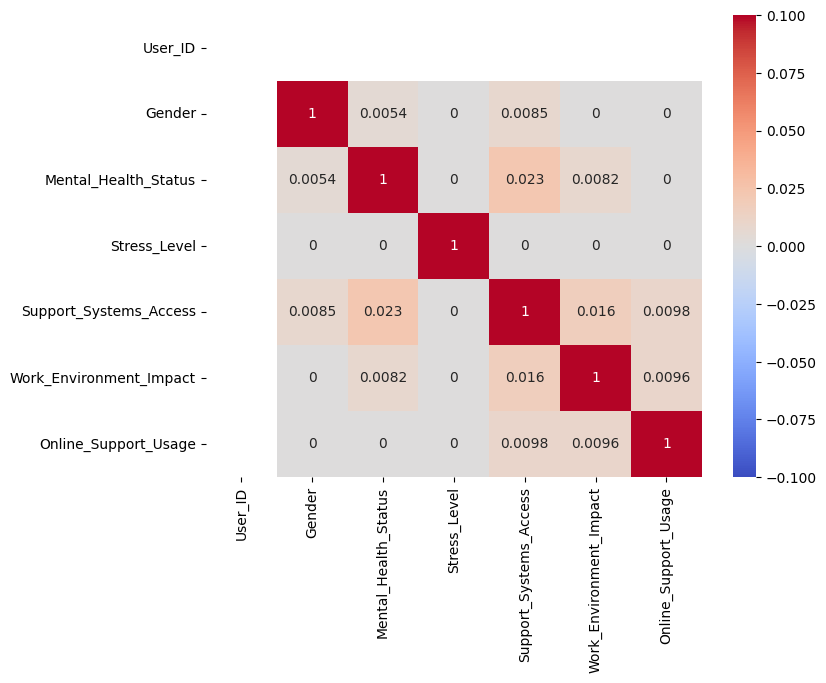

In [39]:
import pandas as pd
import numpy as np
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

#correlation between all object columns
obj_cols = mental_df.select_dtypes(include="object").columns
results = pd.DataFrame(index=obj_cols, columns=obj_cols)

for col1 in obj_cols:
    for col2 in obj_cols:
        results.loc[col1, col2] = cramers_v(mental_df[col1], mental_df[col2])

results = results.astype(float)

plt.figure(figsize=(8,6))
sns.heatmap(results, annot=True, cmap="coolwarm")
plt.show()


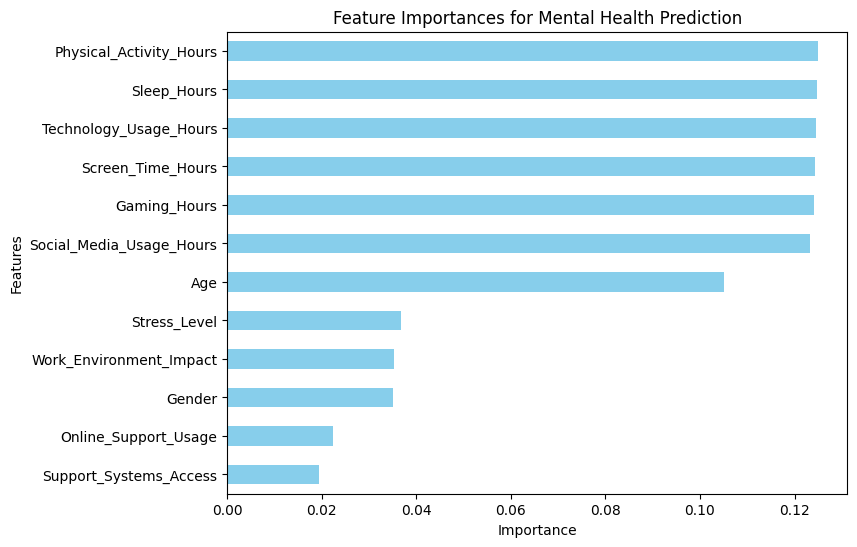

In [ ]:
# Find the most important metrics

# Make a copy to not change the original file
df = mental_df.copy()

# Drop User_ID since it's not needed in the analysis
df = df.drop("User_ID", axis=1)

for col in df.select_dtypes(include="object").columns:
    if col != "Mental_Health_Status":   # don't encode the target yet
        df[col] = LabelEncoder().fit_transform(df[col])

y = LabelEncoder().fit_transform(df["Mental_Health_Status"])
X = df.drop("Mental_Health_Status", axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature importances to find the most important ones
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8,6))
importances.plot(kind="barh", color="skyblue")
plt.title("Feature Importances for Mental Health Prediction")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
